# Data Wrangling Homework

In the spirit of warming up for final projects, this weeks homework will be somewhat open-ended. Actually, it will more like closed-ended and open-middled...

Different doctors with different backgrounds, trained in different places, etc., might behave differently. In other words, one doctor might have various biases relative to another. We hope not, at least in critical situations, but doctors are people too.

Your job is to determine whether the 4 doctors in our data set are behaving essentially the same with respect to measuring clump thickness, bland chromatin, and diagnosis of tumor type, or whether any one of them seems to be different. 

The submission should be a pdf that makes your case as though to a boss/hospital administrator; it should make the case in enough detail to be convincing, but not in such detail that your boss will hate you. For example, one doctor-to-doctor comparison can be described in some detail, but the rest can be summarized with "Similar comparisons were made for ..."

Your final conclusion should be whether 1) everything seems okay with respect to the doctors or 2) if there are any red flags that might warrent further scrutiny.

Do the analysis with an open mind. It's not good to enter an analysis with a pre-conceived notion of what you may or may not find.

In [198]:
my_col_names

Index(['clump_thickness', 'bland_chromatin', 'class', 'doctor_name'], dtype='object')

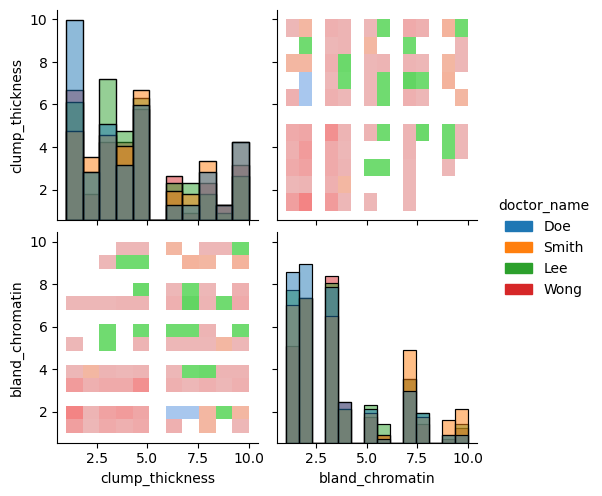

In [201]:
sns.pairplot(bcd[my_col_names], kind = 'hist', hue = 'doctor_name')